In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('Data/Train_Test/X_train.csv').to_numpy()
y_train = pd.read_csv('Data/Train_Test/y_train.csv').to_numpy()
X_test = pd.read_csv('Data/Train_Test/X_test.csv').to_numpy()
y_test = pd.read_csv('Data/Train_Test/y_test.csv').to_numpy()

In [3]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [4]:
print("Coefficient of determination R^2 <-- on train set: {}".format(rf.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9180145146382064


In [5]:
print("Coefficient of determination R^2 <-- on test set: {}".format(rf.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.33614538919675196


In [6]:
mse = cross_val_score(rf,X_train,y_train,cv=5)
mean_mse = mse.mean()
print(mean_mse)

0.37480682260636833


In [7]:
pred = rf.predict(X_test)

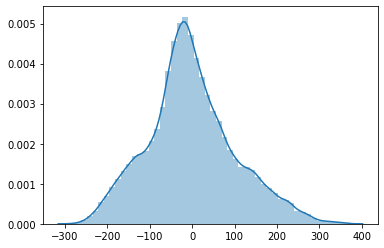

In [8]:
sns.distplot(y_test-pred)

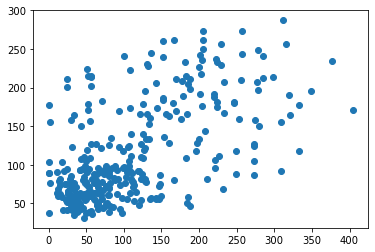

In [9]:
plt.scatter(y_test,pred)

In [10]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 48.67519473816717
MSE: 4528.924467986462
RMSE: 67.2972842541693


### Hyperparameter tunning using Random Forest 

In [11]:
RandomForestRegressor()

RandomForestRegressor()

In [12]:
#Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

bootstrap = [True, False]


In [13]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [14]:
rf = RandomForestRegressor()
random_regressor = RandomizedSearchCV(rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv = 5,verbose=2,random_state=2,n_jobs=1)

In [15]:
random_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.0s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.4s
[CV] n_estimators=300, min_samples_split=10

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.6s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=800, mi

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=300, min_samples_split=15,

[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=5,

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   2.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   2.1s
[CV] n_estimators=1200, min_samples_split=10

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.3s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.1s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=900, min_samples_split=15, min_s

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=

[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=20, total=   3.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.1s
[CV] n_estimators=400, min_samples_split=5, min_

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.5s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samp

[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min

[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=700, min_samples_split=100, min_sampl

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.3s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=200, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  8.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=2, scoring='neg_mean_squared_error', verbose=2)

In [16]:
random_regressor.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [17]:
random_regressor.best_score_

-3748.227494198623

In [18]:
pred = random_regressor.predict(X_test)

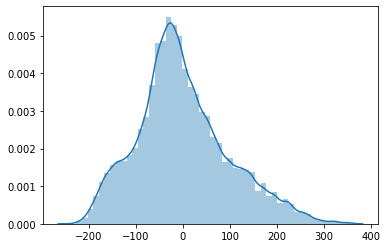

In [19]:
sns.distplot(y_test-pred)

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 47.144522913572494
MSE: 4190.675033753589
RMSE: 64.73542333030339


In [21]:
# open a file, where you ant to store the data
file = open('Random_forest_regressor.pkl', 'wb')

# dump information to that file
pickle.dump(random_regressor, file)
file.close()